In [4]:
## Semester Project: NBA Rookie of the Year (RotY) Award

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
nba = pd.read_table('nba_rookies_2013-2019.csv', delimiter=',')
nba.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Season,Winner
0,1,Luka Doncic,19,DAL,98,496,500,0.992,72,32.2,...,6.0,1.1,0.3,0.427,0.327,0.713,4.9,0.101,18-19,1
1,2,Trae Young,20,ATL,2,301,500,0.602,81,30.9,...,8.1,0.9,0.2,0.418,0.324,0.829,3.3,0.062,18-19,0
2,3,Deandre Ayton,20,PHO,0,66,500,0.132,71,30.7,...,1.8,0.9,0.9,0.585,0.000,0.746,5.8,0.128,18-19,0
3,4,Jaren Jackson Jr.,19,MEM,0,12,500,0.024,58,26.1,...,1.1,0.9,1.4,0.506,0.359,0.766,3.3,0.105,18-19,0
4,5,Collin Sexton,20,CLE,0,10,500,0.020,82,31.8,...,3.0,0.5,0.1,0.430,0.402,0.839,-0.6,-0.011,18-19,0


The data dates from the 2013-14 NBA season to the 2018-19 NBA season

Number of players that played all (82) games: 9
Number of 19 year old rookies: 12
Number of rookies from the Phildalpehia 76ers: 5

My hypothesis is that the number of games played is one of the most important factors in determining RotY winners.
Let's see a bar graph comparing these two statistics.


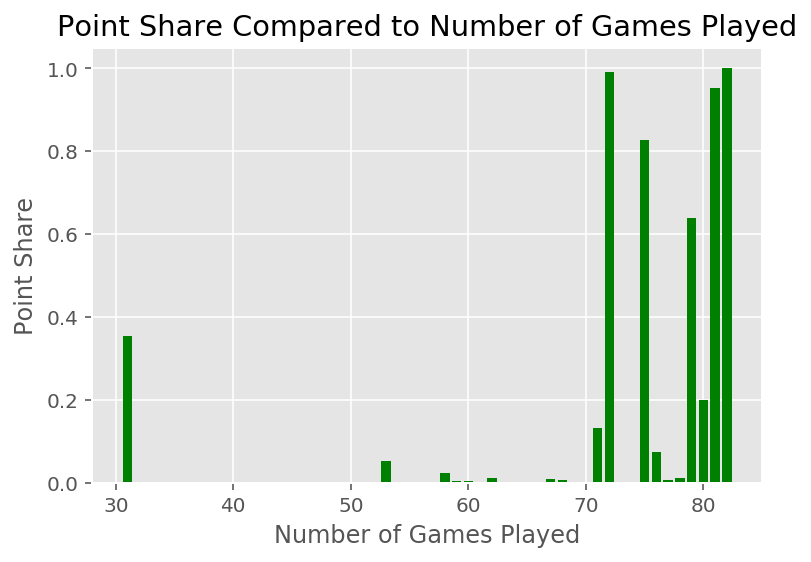

From this, we can see that there is a clear trend among the RotY winners that playing most of the games is important to winning the award.

There was an outlier to this general rule, let's see who it was...

The person who got nearly 40% of their possible points despite only playing around 30 games was...
Joel Embiid's rookie season statistics:
Rank                 3
Player     Joel Embiid
Age                 22
Tm                 PHI
First               23
Pts Won            177
Pts Max            500
Share            0.354
G                   31
MP                25.4
PTS               20.2
TRB                7.8
AST                2.1
STL                0.9
BLK                2.5
FG%              0.466
3P%              0.367
FT%              0.783
WS                 1.9
WS/48            0.117
Season           16-17
Winner               0
Name: 16, dtype: object

Joel Embiid averaged 20.2pts, 7.8reb, 2.1ast, 0.9stl, 2.5blk in his rookie season.
Unfortunately, injuries caused him to m

,Rank,Age,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Winner
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,38.000000,40.000000,40.000000,40.000000,40.000000
mean,4.575000,20.475000,14.025000,126.225000,560.625000,0.22500,72.475000,26.855000,12.562500,5.122500,2.655000,0.905000,0.710000,0.455825,0.302421,0.739625,3.087500,0.078450,0.125000
std,2.437816,1.601081,33.576921,188.689881,73.921194,0.33247,11.390476,4.686639,4.242682,2.202037,1.962462,0.360875,0.637624,0.063104,0.102429,0.088747,2.401302,0.055763,0.334932
min,1.000000,19.000000,0.000000,1.000000,500.000000,0.00200,31.000000,17.200000,6.400000,2.400000,0.600000,0.400000,0.100000,0.364000,0.000000,0.551000,-2.100000,-0.049000,0.000000
25%,2.750000,19.000000,0.000000,3.000000,500.000000,0.00575,67.750000,23.525000,9.725000,3.300000,1.275000,0.600000,0.275000,0.416750,0.310250,0.684750,1.575000,0.041500,0.000000
50%,4.500000,20.000000,0.000000,11.000000,505.000000,0.02200,76.500000,26.750000,12.350000,4.650000,2.050000,0.900000,0.450000,0.441500,0.329500,0.741500,2.900000,0.075500,0.000000
75%,7.000000,21.250000,3.000000,199.250000,650.000000,0.39425,81.000000,30.550000,15.875000,7.000000,3.350000,1.025000,0.925000,0.481500,0.349000,0.814750,4.175000,0.109250,0.000000
max,9.000000,25.000000,130.000000,650.000000,650.000000,1.00000,82.000000,36.200000,21.200000,10.500000,8.200000,1.800000,2.500000,0.694000,0.434000,0.883000,9.200000,0.217000,1.000000


In [29]:
# Template item 5: Preprocessing
print("The data dates from the 2013-14 NBA season to the 2018-19 NBA season\n")

# Number of players that played 82 games
played_all_games = nba['G'].value_counts()[82]
print(f"Number of players that played all (82) games: {played_all_games}")

nineteen_yr_old_rookies = nba['Age'].value_counts()[19]
print(f"Number of 19 year old rookies: {nineteen_yr_old_rookies}")

phi_rookies = nba['Tm'].value_counts()['PHI']
print(f"Number of rookies from the Phildalpehia 76ers: {phi_rookies}\n")

print("My hypothesis is that the number of games played is one of the most important factors in determining RotY winners.")
print("Let's see a bar graph comparing these two statistics.")
# Share vs Number of Games Played
fig, ax = plt.subplots()
ax.bar(nba['G'], nba['Share'], color = 'green')
plt.title('Point Share Compared to Number of Games Played')
plt.xlabel('Number of Games Played')
plt.ylabel('Point Share')
plt.show()
print(f"From this, we can see that there is a clear trend among the RotY winners that playing most of the games is important to winning the award.\n")
print(f"There was an outlier to this general rule, let's see who it was...\n")

# Find Joel Embiid's index in the dataframe
joel_index = 0
for index, row in nba.iterrows():
    if (row['G'] == 31):
        joel_index = index
        break

print("The person who got nearly 40% of their possible points despite only playing around 30 games was...")
joel_embiid_games_played = nba.iloc[joel_index]
print(f"Joel Embiid's rookie season statistics:\n{joel_embiid_games_played}\n")

print("Joel Embiid averaged 20.2pts, 7.8reb, 2.1ast, 0.9stl, 2.5blk in his rookie season.")
print("Unfortunately, injuries caused him to miss a majority of the season, costing him the RotY award.")
print("Embiid is the most successful draft pick from Philaldelphia's infamous 'The Process' era.")

nba.describe()

In [81]:
inputs = ['G']
target = ['Winner']

train, test = train_test_split(nba, test_size = 0.5)
k = 3
model = sk.neighbors.KNeighborsClassifier(k)

trained = model.fit(train[inputs], train[target].values.ravel())
predicted = model.predict(test[inputs])

score = model.score(test[inputs], test[target])
print(f"Model score (games): {score}")
scores = model_selection.cross_val_score(model, train[inputs], train[target].values.ravel())
print(f"Cross-val score: {scores.mean()}\n")

conf_matrix = confusion_matrix(test[target], predicted)
print(conf_matrix)

class_report = classification_report(test[target], predicted)
print(class_report)

inputs = ['PTS']
trained = model.fit(train[inputs], train[target].values.ravel())
predicted = model.predict(test[inputs])

score = model.score(test[inputs], test[target])
print(f"Model score (pts): {score}")
scores = model_selection.cross_val_score(model, train[inputs], train[target].values.ravel())
print(f"Cross-val score: {scores.mean()}\n")

conf_matrix = confusion_matrix(test[target], predicted)
print(conf_matrix)

class_report = classification_report(test[target], predicted)
print(class_report)

inputs = ['WS']
trained = model.fit(train[inputs], train[target].values.ravel())
predicted = model.predict(test[inputs])

score = model.score(test[inputs], test[target])
print(f"Model score (winshares): {score}")
scores = model_selection.cross_val_score(model, train[inputs], train[target].values.ravel())
print(f"Cross-val score: {scores.mean()}\n")

conf_matrix = confusion_matrix(test[target], predicted)
print(conf_matrix)

class_report = classification_report(test[target], predicted)
print(class_report)

inputs = ['G', 'PTS', 'WS']
trained = model.fit(train[inputs], train[target].values.ravel())
predicted = model.predict(test[inputs])

score = model.score(test[inputs], test[target])
print(f"Model score (games, pts, winshares): {score}")
scores = model_selection.cross_val_score(model, train[inputs], train[target].values.ravel())
print(f"Cross-val score: {scores.mean()}\n")

conf_matrix = confusion_matrix(test[target], predicted)
print(conf_matrix)

class_report = classification_report(test[target], predicted)
print(class_report)

Model score (games): 0.9
Cross-val score: 0.85

[[18  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20

Model score (pts): 0.65
Cross-val score: 0.75

[[13  5]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.00      0.00      0.00         2

    accuracy                           0.65        20
   macro avg       0.43      0.36      0.39        20
weighted avg       0.78      0.65      0.71        20

Model score (winshares): 0.9
Cross-val score: 0.85

[[18  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00

/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda

In [19]:
cols = [0,1,4,5,6,7,20]
nba_voting = nba[nba.columns[cols]]
nba_voting.head()

,Rank,Player,First,Pts Won,Pts Max,Share,Season
0,1,Luka Doncic,98,496,500,0.992,18-19
1,2,Trae Young,2,301,500,0.602,18-19
2,3,Deandre Ayton,0,66,500,0.132,18-19
3,4,Jaren Jackson Jr.,0,12,500,0.024,18-19
4,5,Collin Sexton,0,10,500,0.020,18-19


In [20]:
cols = [1,8,9,10,11,12,13,14,20]
nba_playing = nba[nba.columns[cols]]
nba_playing.head()

,Player,G,MP,PTS,TRB,AST,STL,BLK,Season
0,Luka Doncic,72,32.2,21.2,7.8,6.0,1.1,0.3,18-19
1,Trae Young,81,30.9,19.1,3.7,8.1,0.9,0.2,18-19
2,Deandre Ayton,71,30.7,16.3,10.3,1.8,0.9,0.9,18-19
3,Jaren Jackson Jr.,58,26.1,13.8,4.7,1.1,0.9,1.4,18-19
4,Collin Sexton,82,31.8,16.7,2.9,3.0,0.5,0.1,18-19


In [21]:
cols = [1,15,16,17,20]
nba_shooting = nba[nba.columns[cols]]
nba_shooting.head()

,Player,FG%,3P%,FT%,Season
0,Luka Doncic,0.427,0.327,0.713,18-19
1,Trae Young,0.418,0.324,0.829,18-19
2,Deandre Ayton,0.585,0.000,0.746,18-19
3,Jaren Jackson Jr.,0.506,0.359,0.766,18-19
4,Collin Sexton,0.430,0.402,0.839,18-19


In [22]:
cols = [1,18,19,20]
nba_advanced = nba[nba.columns[cols]]
nba_advanced.head()

,Player,WS,WS/48,Season
0,Luka Doncic,4.9,0.101,18-19
1,Trae Young,3.3,0.062,18-19
2,Deandre Ayton,5.8,0.128,18-19
3,Jaren Jackson Jr.,3.3,0.105,18-19
4,Collin Sexton,-0.6,-0.011,18-19


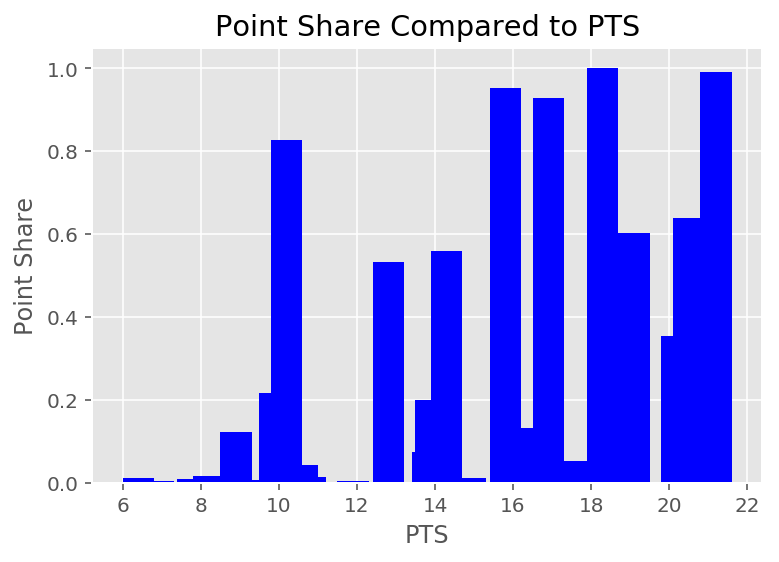

In [32]:
# Share vs PPG
fig, ax = plt.subplots()
ax.bar(nba['PTS'], nba['Share'], color = 'blue')
plt.title('Point Share Compared to PTS')
plt.xlabel('PTS')
plt.ylabel('Point Share')
plt.show()

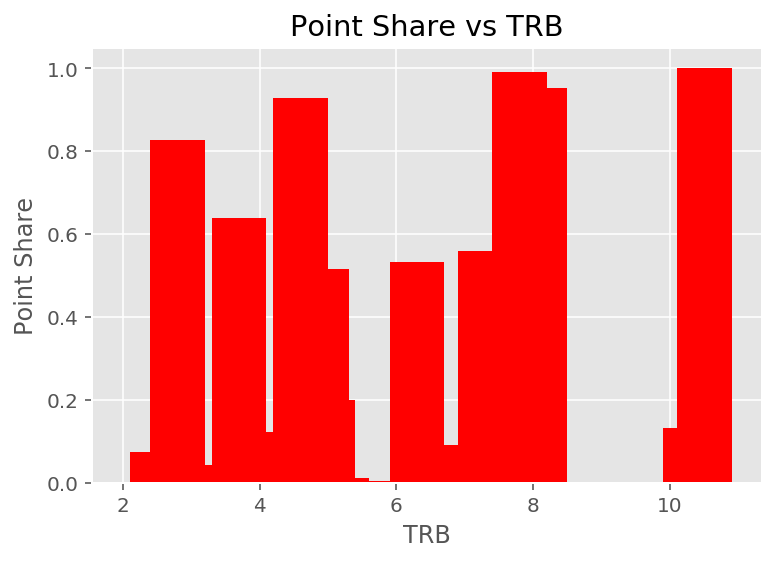

In [28]:
# Share vs TRB
fig, ax = plt.subplots()
ax.bar(nba['TRB'], nba['Share'], color = 'red')
plt.title('Point Share vs TRB')
plt.xlabel('TRB')
plt.ylabel('Point Share')
plt.show()

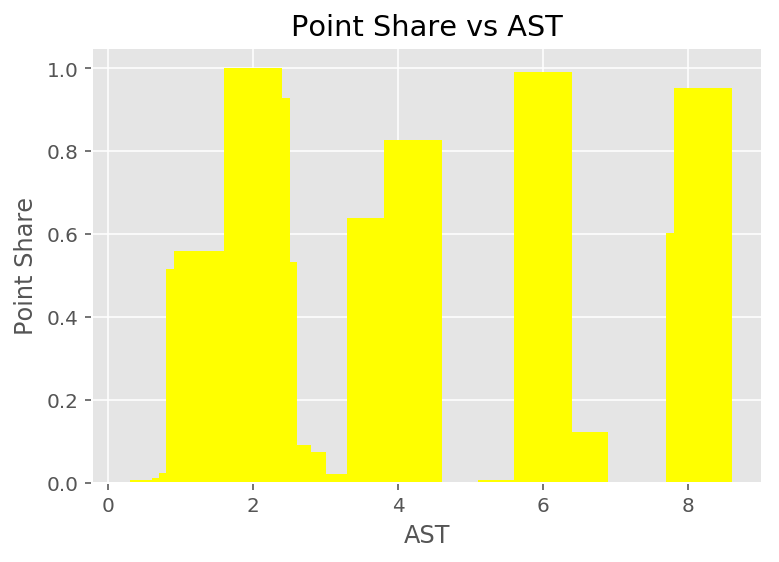

In [29]:
# Share vs AST
fig, ax = plt.subplots()
ax.bar(nba['AST'], nba['Share'], color = 'yellow')
plt.title('Point Share vs AST')
plt.xlabel('AST')
plt.ylabel('Point Share')
plt.show()